In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Lambda, RandomFlip, RandomRotation, \
BatchNormalization, Dropout

from tensorflow.keras import applications
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

In [5]:
#Load train and test set
train_dir = 'Processed Data/train'
test_dir = 'Processed Data/test'
val_dir = 'Processed Data/val'

In [6]:
# Load the data from a directory to a dataset object
# Training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
)

# Testing set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
)

# Validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
)

# Get the class_names
class_names = train_ds.class_names

Found 3257 files belonging to 3 classes.


2022-05-29 13:40:32.471045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-29 13:40:35.588780: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-05-29 13:40:35.588822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7389 MB memory:  -> device: 0, name: GeForce GTX 1080, pci bus id: 0000:05:00.0, compute capability: 6.1


Found 410 files belonging to 3 classes.
Found 406 files belonging to 3 classes.


In [7]:
# Load the densenet121 model, using pretrained 
base_model = applications.DenseNet121(include_top=False,
                                     weights='imagenet',
#                                      input_shape=(224, 224, 3),
                                     pooling='None')

In [8]:
# Get the number of class
num_class = len(class_names)

# Build the model
model = Sequential([
    # Lambda layer to preprocess the data
    # Resize the image
    Lambda(lambda x: tf.image.resize(x, (224, 224)), name='lamb1'), 
    # Preprocess the image
    Lambda(lambda x: applications.densenet.preprocess_input(x), name='lamb2'), 
    # Data augmentation
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    # Add densenet
    base_model,
    # Flatten
    Flatten(),
    # BatchNoemalization
    BatchNormalization(),
    # Add two fully connected layers with dropout
    Dense(256, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.4),
    BatchNormalization(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.4),
    # Output layer
    Dense(num_class, activation='softmax')
])

base_model.trainable = True

# for layer in base_model.layers:
#     if 'conv5' in layer.name:
#         layer.trainable = True
#     else:
#         layer.trainable = False

opt = optimizers.SGD(learning_rate=0.001)
los = keras.losses.SparseCategoricalCrossentropy()
model.compile(optimizer=opt,
              loss=los,
              metrics=['accuracy'])

In [9]:
# Set seed and fit the model
np.random.seed(123)
tf.random.set_seed(123)
history = model.fit(train_ds, 
                    epochs=50,
                    verbose=1,
                    validation_data=val_ds)

Epoch 1/50


2022-05-29 13:41:08.693264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited
2022-05-29 13:41:09.558828: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


 14/102 [===>..........................] - ETA: 27s - loss: 1.5051 - accuracy: 0.4062

2022-05-29 13:41:16.998806: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 1.4269 - accuracy: 0.4306

2022-05-29 13:41:18.262904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 1.2653 - accuracy: 0.4816

2022-05-29 13:41:23.247902: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 1.0779 - accuracy: 0.5540

2022-05-29 13:41:33.255703: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 49s 358ms/step - loss: 0.9454 - accuracy: 0.6125 - val_loss: 0.4321 - val_accuracy: 0.8744
Epoch 2/50


2022-05-29 13:41:49.072414: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.6032 - accuracy: 0.7701

2022-05-29 13:41:53.447137: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.6239 - accuracy: 0.7622

2022-05-29 13:41:54.693330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.5904 - accuracy: 0.7684

2022-05-29 13:41:59.673947: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.5648 - accuracy: 0.7846

2022-05-29 13:42:09.657352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.5250 - accuracy: 0.8038 - val_loss: 0.2951 - val_accuracy: 0.9310
Epoch 3/50


2022-05-29 13:42:21.963954: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.4760 - accuracy: 0.8237

2022-05-29 13:42:26.390418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.4656 - accuracy: 0.8264

2022-05-29 13:42:27.633222: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.4191 - accuracy: 0.8456

2022-05-29 13:42:32.582394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.4141 - accuracy: 0.8523

2022-05-29 13:42:42.523950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 321ms/step - loss: 0.3949 - accuracy: 0.8637 - val_loss: 0.2464 - val_accuracy: 0.9310
Epoch 4/50


2022-05-29 13:42:54.775383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3481 - accuracy: 0.8951

2022-05-29 13:42:59.191869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3622 - accuracy: 0.8924

2022-05-29 13:43:00.440559: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.3586 - accuracy: 0.8842

2022-05-29 13:43:05.411936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.3587 - accuracy: 0.8830

2022-05-29 13:43:15.356095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.3560 - accuracy: 0.8800 - val_loss: 0.2314 - val_accuracy: 0.9433
Epoch 5/50


2022-05-29 13:43:27.655678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3370 - accuracy: 0.8884

2022-05-29 13:43:32.080312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3313 - accuracy: 0.8958

2022-05-29 13:43:33.338936: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.3358 - accuracy: 0.8925

2022-05-29 13:43:38.338684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.3459 - accuracy: 0.8920

2022-05-29 13:43:48.325993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.3336 - accuracy: 0.8928 - val_loss: 0.2340 - val_accuracy: 0.9409
Epoch 6/50


2022-05-29 13:44:00.605789: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3303 - accuracy: 0.9129

2022-05-29 13:44:05.032733: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3256 - accuracy: 0.9028

2022-05-29 13:44:06.295141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.3289 - accuracy: 0.9081

2022-05-29 13:44:11.295191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.3270 - accuracy: 0.9034

2022-05-29 13:44:21.268133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.3186 - accuracy: 0.9070 - val_loss: 0.2282 - val_accuracy: 0.9409
Epoch 7/50


2022-05-29 13:44:33.610734: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3155 - accuracy: 0.8996

2022-05-29 13:44:38.051275: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3157 - accuracy: 0.9010

2022-05-29 13:44:39.313667: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2850 - accuracy: 0.9108

2022-05-29 13:44:44.322187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2892 - accuracy: 0.9148

2022-05-29 13:44:54.385426: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 324ms/step - loss: 0.2788 - accuracy: 0.9177 - val_loss: 0.2315 - val_accuracy: 0.9409
Epoch 8/50


2022-05-29 13:45:06.673160: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3674 - accuracy: 0.8884

2022-05-29 13:45:11.097095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3419 - accuracy: 0.8976

2022-05-29 13:45:12.349819: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.3168 - accuracy: 0.9007

2022-05-29 13:45:17.336357: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.3081 - accuracy: 0.9048

2022-05-29 13:45:27.326833: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2857 - accuracy: 0.9125 - val_loss: 0.2358 - val_accuracy: 0.9335
Epoch 9/50


2022-05-29 13:45:39.638965: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2350 - accuracy: 0.9085

2022-05-29 13:45:44.078441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2486 - accuracy: 0.9080

2022-05-29 13:45:45.334459: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2468 - accuracy: 0.9191

2022-05-29 13:45:50.322087: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2553 - accuracy: 0.9176

2022-05-29 13:46:00.338007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2589 - accuracy: 0.9186 - val_loss: 0.2437 - val_accuracy: 0.9458
Epoch 10/50


2022-05-29 13:46:12.588967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.3274 - accuracy: 0.9018

2022-05-29 13:46:17.006086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.3122 - accuracy: 0.9097

2022-05-29 13:46:18.266716: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.3065 - accuracy: 0.9099

2022-05-29 13:46:23.246997: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2863 - accuracy: 0.9129

2022-05-29 13:46:33.204457: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.2748 - accuracy: 0.9174 - val_loss: 0.2191 - val_accuracy: 0.9360
Epoch 11/50


2022-05-29 13:46:45.497702: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2760 - accuracy: 0.9219

2022-05-29 13:46:49.905445: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2744 - accuracy: 0.9219

2022-05-29 13:46:51.153839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2777 - accuracy: 0.9200

2022-05-29 13:46:56.140688: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2716 - accuracy: 0.9181

2022-05-29 13:47:06.153016: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2540 - accuracy: 0.9202 - val_loss: 0.2389 - val_accuracy: 0.9335
Epoch 12/50


2022-05-29 13:47:18.455992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2213 - accuracy: 0.9420

2022-05-29 13:47:22.869234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2340 - accuracy: 0.9392

2022-05-29 13:47:24.109939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2456 - accuracy: 0.9301

2022-05-29 13:47:29.101903: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2508 - accuracy: 0.9271

2022-05-29 13:47:39.110990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2397 - accuracy: 0.9288 - val_loss: 0.2134 - val_accuracy: 0.9409
Epoch 13/50


2022-05-29 13:47:51.414969: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2590 - accuracy: 0.9219

2022-05-29 13:47:55.801711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2554 - accuracy: 0.9236

2022-05-29 13:47:57.048625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2283 - accuracy: 0.9347

2022-05-29 13:48:02.041597: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2395 - accuracy: 0.9337

2022-05-29 13:48:12.047215: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.2381 - accuracy: 0.9328 - val_loss: 0.2160 - val_accuracy: 0.9507
Epoch 14/50


2022-05-29 13:48:24.333099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2795 - accuracy: 0.9241

2022-05-29 13:48:28.724693: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2648 - accuracy: 0.9271

2022-05-29 13:48:29.969777: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2465 - accuracy: 0.9320

2022-05-29 13:48:34.949771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2204 - accuracy: 0.9394

2022-05-29 13:48:44.937619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.2140 - accuracy: 0.9358 - val_loss: 0.2008 - val_accuracy: 0.9360
Epoch 15/50


2022-05-29 13:48:57.242544: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2654 - accuracy: 0.9219

2022-05-29 13:49:01.652133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2719 - accuracy: 0.9201

2022-05-29 13:49:02.899068: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2245 - accuracy: 0.9320

2022-05-29 13:49:07.867054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2323 - accuracy: 0.9266

2022-05-29 13:49:17.890298: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.2293 - accuracy: 0.9285 - val_loss: 0.1905 - val_accuracy: 0.9433
Epoch 16/50


2022-05-29 13:49:30.166234: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2109 - accuracy: 0.9330

2022-05-29 13:49:34.581015: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2445 - accuracy: 0.9271

2022-05-29 13:49:35.831901: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2198 - accuracy: 0.9347

2022-05-29 13:49:40.829336: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2217 - accuracy: 0.9337

2022-05-29 13:49:50.813007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2118 - accuracy: 0.9358 - val_loss: 0.2017 - val_accuracy: 0.9360
Epoch 17/50


2022-05-29 13:50:03.175567: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1776 - accuracy: 0.9397

2022-05-29 13:50:07.599291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1948 - accuracy: 0.9392

2022-05-29 13:50:08.856319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2244 - accuracy: 0.9347

2022-05-29 13:50:13.854051: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2168 - accuracy: 0.9332

2022-05-29 13:50:23.859875: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2130 - accuracy: 0.9340 - val_loss: 0.2217 - val_accuracy: 0.9310
Epoch 18/50


2022-05-29 13:50:36.141383: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2429 - accuracy: 0.9286

2022-05-29 13:50:40.565980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2357 - accuracy: 0.9323

2022-05-29 13:50:41.813013: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2123 - accuracy: 0.9357

2022-05-29 13:50:46.797953: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2221 - accuracy: 0.9332

2022-05-29 13:50:56.791610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2181 - accuracy: 0.9352 - val_loss: 0.2164 - val_accuracy: 0.9310
Epoch 19/50


2022-05-29 13:51:09.099093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2212 - accuracy: 0.9420

2022-05-29 13:51:13.519530: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2033 - accuracy: 0.9479

2022-05-29 13:51:14.779905: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1921 - accuracy: 0.9449

2022-05-29 13:51:19.781964: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1988 - accuracy: 0.9432

2022-05-29 13:51:29.830199: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 324ms/step - loss: 0.1951 - accuracy: 0.9435 - val_loss: 0.1902 - val_accuracy: 0.9433
Epoch 20/50


2022-05-29 13:51:42.212575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2289 - accuracy: 0.9241

2022-05-29 13:51:46.620372: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2135 - accuracy: 0.9236

2022-05-29 13:51:47.876239: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2171 - accuracy: 0.9246

2022-05-29 13:51:52.840056: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.2063 - accuracy: 0.9332

2022-05-29 13:52:02.780542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.2038 - accuracy: 0.9343 - val_loss: 0.1815 - val_accuracy: 0.9458
Epoch 21/50


2022-05-29 13:52:15.077468: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2266 - accuracy: 0.9375

2022-05-29 13:52:19.492851: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2252 - accuracy: 0.9410

2022-05-29 13:52:20.752320: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2150 - accuracy: 0.9366

2022-05-29 13:52:25.731648: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1975 - accuracy: 0.9394

2022-05-29 13:52:35.724105: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.2042 - accuracy: 0.9377 - val_loss: 0.1997 - val_accuracy: 0.9433
Epoch 22/50


2022-05-29 13:52:48.053771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1826 - accuracy: 0.9531

2022-05-29 13:52:52.492159: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1705 - accuracy: 0.9514

2022-05-29 13:52:53.743351: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1800 - accuracy: 0.9421

2022-05-29 13:52:58.713371: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1843 - accuracy: 0.9399

2022-05-29 13:53:08.690113: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1746 - accuracy: 0.9423 - val_loss: 0.1941 - val_accuracy: 0.9360
Epoch 23/50


2022-05-29 13:53:20.995649: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2477 - accuracy: 0.9263

2022-05-29 13:53:25.399309: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2354 - accuracy: 0.9288

2022-05-29 13:53:26.653508: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.2105 - accuracy: 0.9338

2022-05-29 13:53:31.631277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1967 - accuracy: 0.9351

2022-05-29 13:53:41.634420: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1917 - accuracy: 0.9355 - val_loss: 0.1948 - val_accuracy: 0.9335
Epoch 24/50


2022-05-29 13:53:53.940153: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1993 - accuracy: 0.9442

2022-05-29 13:53:58.358882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1830 - accuracy: 0.9479

2022-05-29 13:53:59.603135: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1872 - accuracy: 0.9412

2022-05-29 13:54:04.598908: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1967 - accuracy: 0.9384

2022-05-29 13:54:14.616202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1825 - accuracy: 0.9426 - val_loss: 0.2007 - val_accuracy: 0.9384
Epoch 25/50


2022-05-29 13:54:26.926493: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1591 - accuracy: 0.9554

2022-05-29 13:54:31.340858: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1514 - accuracy: 0.9549

2022-05-29 13:54:32.596375: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1799 - accuracy: 0.9393

2022-05-29 13:54:37.599767: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1862 - accuracy: 0.9389

2022-05-29 13:54:47.566246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1829 - accuracy: 0.9414 - val_loss: 0.1949 - val_accuracy: 0.9433
Epoch 26/50


2022-05-29 13:54:59.875711: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2300 - accuracy: 0.9286

2022-05-29 13:55:04.296989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1998 - accuracy: 0.9392

2022-05-29 13:55:05.547968: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1860 - accuracy: 0.9403

2022-05-29 13:55:10.542066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1852 - accuracy: 0.9422

2022-05-29 13:55:20.499458: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1758 - accuracy: 0.9429 - val_loss: 0.1998 - val_accuracy: 0.9360
Epoch 27/50


2022-05-29 13:55:32.810405: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2291 - accuracy: 0.9263

2022-05-29 13:55:37.229495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.2260 - accuracy: 0.9271

2022-05-29 13:55:38.480867: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1846 - accuracy: 0.9338

2022-05-29 13:55:43.481549: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1781 - accuracy: 0.9403

2022-05-29 13:55:53.450772: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1701 - accuracy: 0.9457 - val_loss: 0.1831 - val_accuracy: 0.9433
Epoch 28/50


2022-05-29 13:56:05.747686: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1783 - accuracy: 0.9487

2022-05-29 13:56:10.155233: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1768 - accuracy: 0.9514

2022-05-29 13:56:11.398900: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1770 - accuracy: 0.9476

2022-05-29 13:56:16.405448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1817 - accuracy: 0.9437

2022-05-29 13:56:26.399168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1746 - accuracy: 0.9475 - val_loss: 0.1743 - val_accuracy: 0.9507
Epoch 29/50


2022-05-29 13:56:38.731095: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1597 - accuracy: 0.9531

2022-05-29 13:56:43.156441: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1599 - accuracy: 0.9549

2022-05-29 13:56:44.418682: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1530 - accuracy: 0.9586

2022-05-29 13:56:49.409974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1586 - accuracy: 0.9536

2022-05-29 13:56:59.377415: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1549 - accuracy: 0.9539 - val_loss: 0.1733 - val_accuracy: 0.9532
Epoch 30/50


2022-05-29 13:57:11.639008: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1686 - accuracy: 0.9531

2022-05-29 13:57:16.069391: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1655 - accuracy: 0.9497

2022-05-29 13:57:17.326771: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1666 - accuracy: 0.9494

2022-05-29 13:57:22.309511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1730 - accuracy: 0.9460

2022-05-29 13:57:32.285726: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1723 - accuracy: 0.9450 - val_loss: 0.1902 - val_accuracy: 0.9458
Epoch 31/50


2022-05-29 13:57:44.582780: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.2023 - accuracy: 0.9420

2022-05-29 13:57:49.001524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1873 - accuracy: 0.9444

2022-05-29 13:57:50.257248: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1605 - accuracy: 0.9494

2022-05-29 13:57:55.251246: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1758 - accuracy: 0.9403

2022-05-29 13:58:05.190575: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1711 - accuracy: 0.9432 - val_loss: 0.1774 - val_accuracy: 0.9483
Epoch 32/50


2022-05-29 13:58:17.497226: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1747 - accuracy: 0.9375

2022-05-29 13:58:21.911099: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1585 - accuracy: 0.9444

2022-05-29 13:58:23.156361: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1589 - accuracy: 0.9430

2022-05-29 13:58:28.144319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1596 - accuracy: 0.9460

2022-05-29 13:58:38.153382: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1546 - accuracy: 0.9472 - val_loss: 0.1760 - val_accuracy: 0.9458
Epoch 33/50


2022-05-29 13:58:50.469379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1492 - accuracy: 0.9464

2022-05-29 13:58:54.871674: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1464 - accuracy: 0.9514

2022-05-29 13:58:56.118398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1438 - accuracy: 0.9559

2022-05-29 13:59:01.124353: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1625 - accuracy: 0.9474

2022-05-29 13:59:11.099485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1516 - accuracy: 0.9500 - val_loss: 0.1759 - val_accuracy: 0.9458
Epoch 34/50


2022-05-29 13:59:23.428583: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1691 - accuracy: 0.9531

2022-05-29 13:59:27.851112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1601 - accuracy: 0.9583

2022-05-29 13:59:29.108783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1442 - accuracy: 0.9568

2022-05-29 13:59:34.087989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1542 - accuracy: 0.9541

2022-05-29 13:59:44.068977: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1546 - accuracy: 0.9524 - val_loss: 0.1613 - val_accuracy: 0.9557
Epoch 35/50


2022-05-29 13:59:56.386146: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1650 - accuracy: 0.9420

2022-05-29 14:00:00.801247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1639 - accuracy: 0.9462

2022-05-29 14:00:02.058524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1741 - accuracy: 0.9458

2022-05-29 14:00:07.052168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1642 - accuracy: 0.9474

2022-05-29 14:00:17.066162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1601 - accuracy: 0.9457 - val_loss: 0.1560 - val_accuracy: 0.9581
Epoch 36/50


2022-05-29 14:00:29.356101: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1832 - accuracy: 0.9420

2022-05-29 14:00:33.769848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1855 - accuracy: 0.9444

2022-05-29 14:00:35.025931: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1550 - accuracy: 0.9531

2022-05-29 14:00:40.004697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1517 - accuracy: 0.9517

2022-05-29 14:00:49.989773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1445 - accuracy: 0.9521 - val_loss: 0.1526 - val_accuracy: 0.9606
Epoch 37/50


2022-05-29 14:01:02.337472: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1764 - accuracy: 0.9442

2022-05-29 14:01:06.753157: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1637 - accuracy: 0.9462

2022-05-29 14:01:07.995781: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1521 - accuracy: 0.9485

2022-05-29 14:01:12.987108: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1648 - accuracy: 0.9484

2022-05-29 14:01:22.989492: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1611 - accuracy: 0.9478 - val_loss: 0.1654 - val_accuracy: 0.9557
Epoch 38/50


2022-05-29 14:01:35.287730: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1659 - accuracy: 0.9531

2022-05-29 14:01:39.709053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1619 - accuracy: 0.9514

2022-05-29 14:01:40.959318: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1606 - accuracy: 0.9531

2022-05-29 14:01:45.914398: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1571 - accuracy: 0.9503

2022-05-29 14:01:55.950606: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1489 - accuracy: 0.9500 - val_loss: 0.1596 - val_accuracy: 0.9532
Epoch 39/50


2022-05-29 14:02:08.248951: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1473 - accuracy: 0.9442

2022-05-29 14:02:12.677431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1488 - accuracy: 0.9462

2022-05-29 14:02:13.931152: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1578 - accuracy: 0.9540

2022-05-29 14:02:18.904279: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1624 - accuracy: 0.9522

2022-05-29 14:02:28.918106: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1530 - accuracy: 0.9527 - val_loss: 0.1590 - val_accuracy: 0.9581
Epoch 40/50


2022-05-29 14:02:41.251384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1662 - accuracy: 0.9397

2022-05-29 14:02:45.651264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1728 - accuracy: 0.9358

2022-05-29 14:02:46.911167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1492 - accuracy: 0.9504

2022-05-29 14:02:51.915792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1478 - accuracy: 0.9508

2022-05-29 14:03:01.906517: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1426 - accuracy: 0.9546 - val_loss: 0.1599 - val_accuracy: 0.9532
Epoch 41/50


2022-05-29 14:03:14.207374: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1612 - accuracy: 0.9420

2022-05-29 14:03:18.626876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1370 - accuracy: 0.9514

2022-05-29 14:03:19.883214: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1170 - accuracy: 0.9596

2022-05-29 14:03:24.883091: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1349 - accuracy: 0.9550

2022-05-29 14:03:34.877251: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 324ms/step - loss: 0.1350 - accuracy: 0.9546 - val_loss: 0.1547 - val_accuracy: 0.9532
Epoch 42/50


2022-05-29 14:03:47.283231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1738 - accuracy: 0.9464

2022-05-29 14:03:51.696877: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1652 - accuracy: 0.9514

2022-05-29 14:03:52.956014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1673 - accuracy: 0.9513

2022-05-29 14:03:57.971880: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1553 - accuracy: 0.9503

2022-05-29 14:04:07.989296: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1410 - accuracy: 0.9543 - val_loss: 0.1502 - val_accuracy: 0.9532
Epoch 43/50


2022-05-29 14:04:20.302352: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1481 - accuracy: 0.9531

2022-05-29 14:04:24.733796: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1260 - accuracy: 0.9618

2022-05-29 14:04:25.994890: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1357 - accuracy: 0.9559

2022-05-29 14:04:31.000495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1396 - accuracy: 0.9517

2022-05-29 14:04:41.071746: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 324ms/step - loss: 0.1450 - accuracy: 0.9515 - val_loss: 0.1550 - val_accuracy: 0.9557
Epoch 44/50


2022-05-29 14:04:53.435247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1498 - accuracy: 0.9531

2022-05-29 14:04:57.882603: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1659 - accuracy: 0.9462

2022-05-29 14:04:59.147464: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1426 - accuracy: 0.9540

2022-05-29 14:05:04.192043: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1417 - accuracy: 0.9541

2022-05-29 14:05:14.263918: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 324ms/step - loss: 0.1336 - accuracy: 0.9570 - val_loss: 0.1451 - val_accuracy: 0.9606
Epoch 45/50


2022-05-29 14:05:26.561841: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1136 - accuracy: 0.9732

2022-05-29 14:05:30.975601: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1298 - accuracy: 0.9670

2022-05-29 14:05:32.235721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1387 - accuracy: 0.9568

2022-05-29 14:05:37.237906: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1414 - accuracy: 0.9564

2022-05-29 14:05:47.231810: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1440 - accuracy: 0.9533 - val_loss: 0.1438 - val_accuracy: 0.9606
Epoch 46/50


2022-05-29 14:05:59.550561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1401 - accuracy: 0.9576

2022-05-29 14:06:03.959021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1584 - accuracy: 0.9514

2022-05-29 14:06:05.210978: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1429 - accuracy: 0.9559

2022-05-29 14:06:10.215805: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1433 - accuracy: 0.9517

2022-05-29 14:06:20.232691: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1351 - accuracy: 0.9543 - val_loss: 0.1402 - val_accuracy: 0.9631
Epoch 47/50


2022-05-29 14:06:32.532520: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1552 - accuracy: 0.9509

2022-05-29 14:06:36.956480: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1407 - accuracy: 0.9549

2022-05-29 14:06:38.202713: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1353 - accuracy: 0.9577

2022-05-29 14:06:43.196783: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1407 - accuracy: 0.9574

2022-05-29 14:06:53.194077: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1397 - accuracy: 0.9567 - val_loss: 0.1405 - val_accuracy: 0.9631
Epoch 48/50


2022-05-29 14:07:05.509027: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1354 - accuracy: 0.9509

2022-05-29 14:07:09.935322: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1432 - accuracy: 0.9497

2022-05-29 14:07:11.181071: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1486 - accuracy: 0.9550

2022-05-29 14:07:16.185539: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1470 - accuracy: 0.9550

2022-05-29 14:07:26.193037: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1456 - accuracy: 0.9543 - val_loss: 0.1551 - val_accuracy: 0.9606
Epoch 49/50


2022-05-29 14:07:38.519086: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1698 - accuracy: 0.9464

2022-05-29 14:07:42.948909: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1707 - accuracy: 0.9497

2022-05-29 14:07:44.213384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1558 - accuracy: 0.9485

2022-05-29 14:07:49.200804: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1454 - accuracy: 0.9517

2022-05-29 14:07:59.210697: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 323ms/step - loss: 0.1358 - accuracy: 0.9549 - val_loss: 0.1458 - val_accuracy: 0.9631
Epoch 50/50


2022-05-29 14:08:11.515400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 14/102 [===>..........................] - ETA: 27s - loss: 0.1391 - accuracy: 0.9487

2022-05-29 14:08:15.926596: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 18/102 [====>.........................] - ETA: 26s - loss: 0.1326 - accuracy: 0.9549

2022-05-29 14:08:17.187762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 34/102 [=========>....................] - ETA: 21s - loss: 0.1206 - accuracy: 0.9559

2022-05-29 14:08:22.159220: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


 66/102 [==================>...........] - ETA: 11s - loss: 0.1246 - accuracy: 0.9560

2022-05-29 14:08:32.181706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: Not recognizing known sRGB profile that has been edited


102/102 [==============================] - 33s 322ms/step - loss: 0.1277 - accuracy: 0.9564 - val_loss: 0.1510 - val_accuracy: 0.9606


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lamb1 (Lambda)              (None, 224, 224, 3)       0         
                                                                 
 lamb2 (Lambda)              (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                        

In [11]:
# Evaluate model on test dataset
model.evaluate(test_ds)

13/13 [==============================] - 2s 125ms/step - loss: 0.1420 - accuracy: 0.9537


[0.14199049770832062, 0.9536585211753845]

In [12]:
# Retrieve the images and labels in test set
ds = [(x, y) for x, y in test_ds]
y = np.concatenate([y for x, y in ds], axis=0)
y.shape
x = np.concatenate([x for x, y in ds], axis=0)
x.shape

(410, 256, 256, 3)

In [13]:
def predict_class(output):
    result = np.argmax(model.predict(output), axis=1)
    return result
predicted = predict_class(x)

13/13 [==============================] - 2s 69ms/step


In [15]:
# Rename the classes
class_names
class_names = ['mask worn incorrectly', 'with mask', 'without mask']

In [16]:
# Get the confusion matrix
confusion_matrix(y, predicted)

array([[  6,   6,   1],
       [  2, 313,   9],
       [  0,   1,  72]])

In [17]:
# Get all misclassified images
misclass = [(im, label, pred) for im, label, pred in \
            zip(x[predicted != y], y[predicted != y], predicted[predicted != y])]

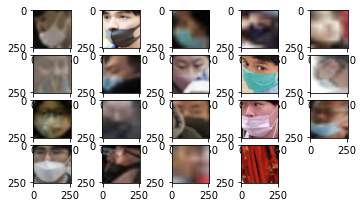

In [18]:
# Display all images that are misclassified
i = 0
for im, label, pred in misclass:
    ax = plt.subplot(5, 5, i + 1)
    i += 1
    plt.imshow(im/255)

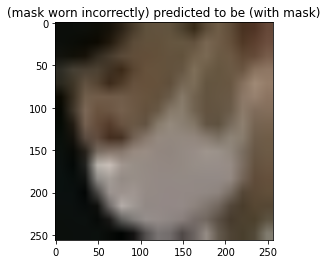

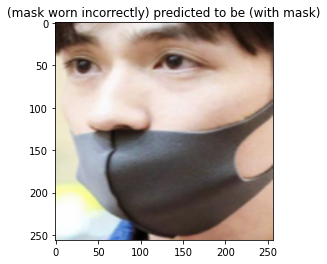

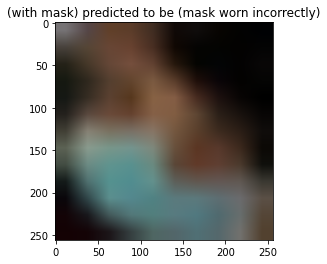

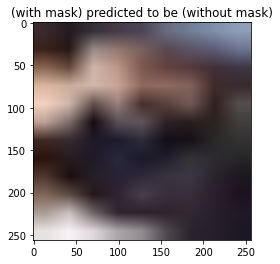

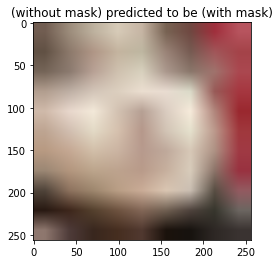

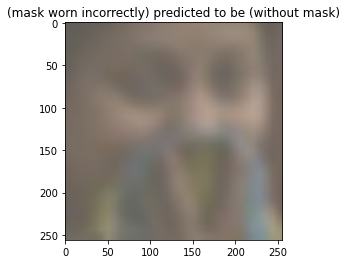

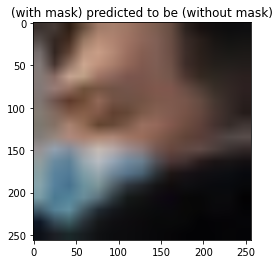

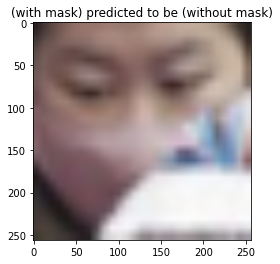

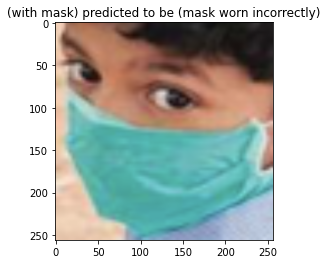

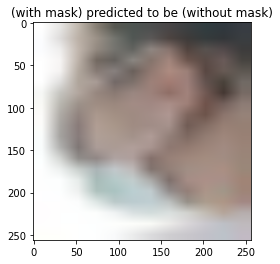

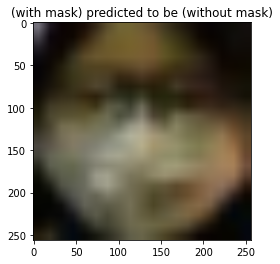

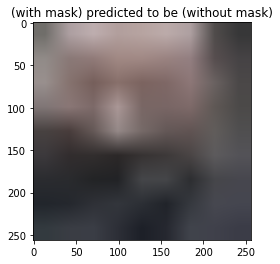

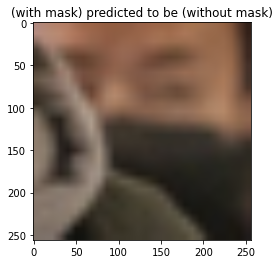

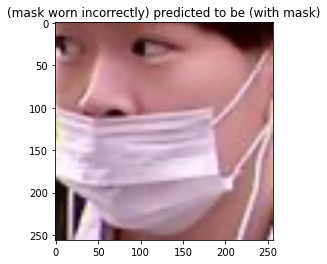

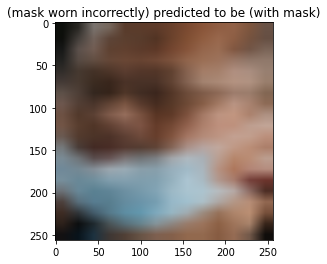

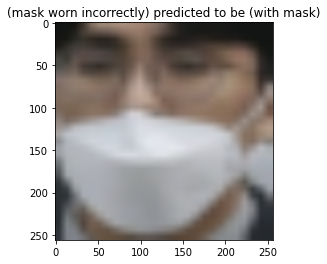

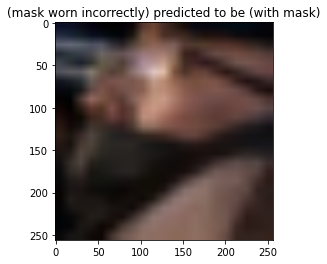

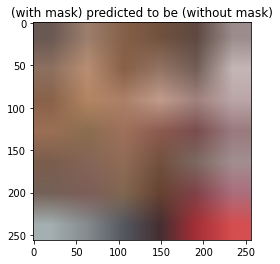

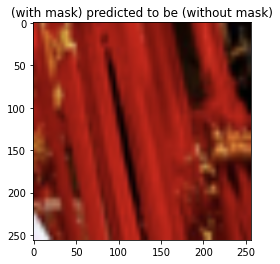

In [19]:
# Inspect the misclassified images one by one
for im, label, pred in misclass:
    plt.figure()
    plt.imshow(im/255)
    plt.title(f'({class_names[label]}) predicted to be ({class_names[pred]})')

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y, predicted, target_names=class_names))

                       precision    recall  f1-score   support

mask worn incorrectly       0.75      0.46      0.57        13
            with mask       0.98      0.97      0.97       324
         without mask       0.88      0.99      0.93        73

             accuracy                           0.95       410
            macro avg       0.87      0.80      0.82       410
         weighted avg       0.95      0.95      0.95       410



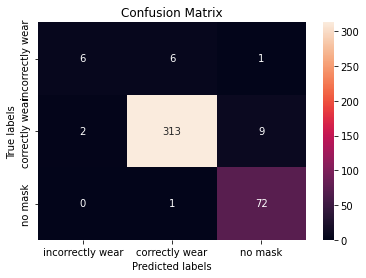

In [30]:
import seaborn as sns
import sklearn

T5_lables = ['incorrectly wear','correctly wear','no mask']    

ax= plt.subplot()

cm = sklearn.metrics.confusion_matrix(np.asarray(y), np.asarray(predicted))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);
plt.savefig('conf.png')